<br><br>
<h1 align="center"> 03 More Data Visualization and Inferences - 538 </h1>
<br><br>

In [1]:
'''Import the libraries'''
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import HTML
import hashlib
import joblib
import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score

'''This notebook will use five thirtyeight style'''
plt.style.use('fivethirtyeight')

In [2]:
'''Load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)

In [3]:
'''Update the datetime columns from string to datetime'''
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])

In [4]:
'''For EDA, we will use the year 2018 data'''
loan_data_2018 = loan_data[loan_data['issue_d'].dt.year == 2018]
# loan_risk_data_2018 = loan_data_2018[loan_data_2018['loan_status'] != 'Fully Paid']
loan_data_2018.shape

(57924, 38)

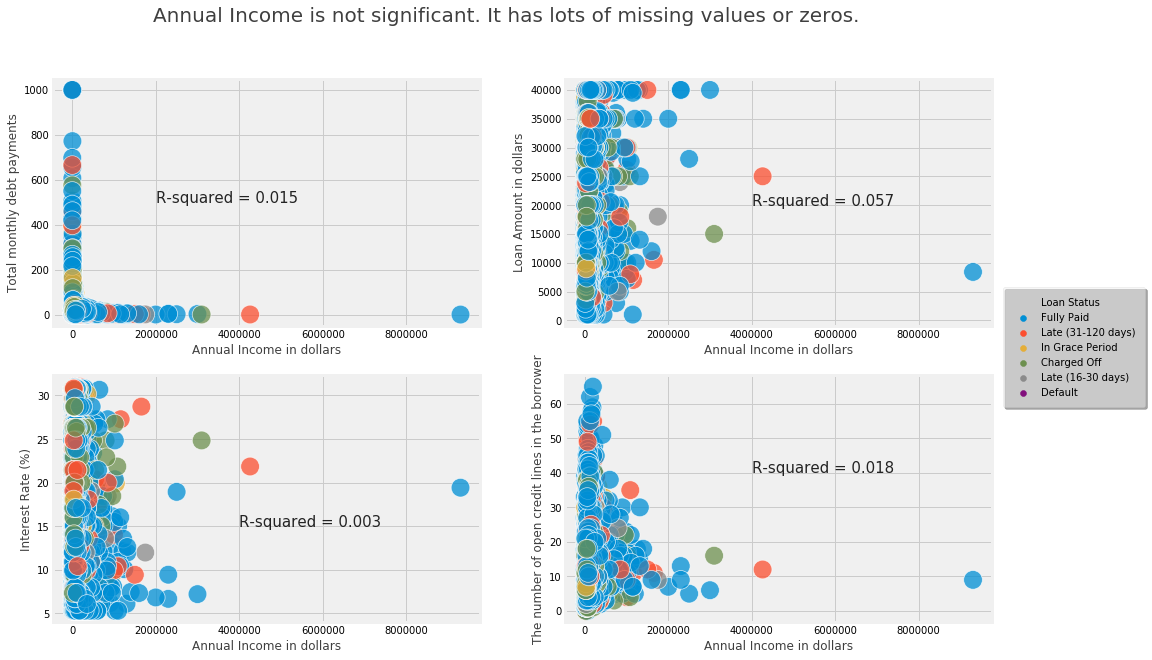

In [20]:
'''Annual Income Distribution'''
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10))

'''first plot'''
plt.subplot(2, 2, 1)
sns.scatterplot(x="annual_inc", y="dti", hue='loan_status', data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('Total monthly debt payments', alpha = 0.75)
    
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['dti'])
r_value = r_value*r_value

txt1 = "R-squared = {:1.3f}" 
plt.text(x=2000000, y=500, s=txt1.format(r_value), fontsize=15, alpha=0.85)


'''second plot'''
plt.subplot(2, 2, 2)
sns.scatterplot(x="annual_inc", y="loan_amnt", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('Loan Amount in dollars', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['loan_amnt'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
plt.text(x=4000000, y=20000, s=txt2.format(r_value), fontsize=15, alpha=0.85)


'''third plot'''
plt.subplot(2, 2, 3)
sns.scatterplot(x="annual_inc", y="int_rate", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('Interest Rate (%)', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['int_rate'])
r_value = r_value*r_value
txt3 = "R-squared = {:1.3f}" 
plt.text(x=4000000, y=15, s=txt3.format(r_value), fontsize=15, alpha=0.85)

'''fourth plot'''
plt.subplot(2, 2, 4)
sns.scatterplot(x="annual_inc", y="open_acc", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350)

plt.xlabel('Annual Income in dollars', alpha = 0.75)
plt.ylabel('The number of open credit lines in the borrower', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['annual_inc'], loan_data_2018['open_acc'])
r_value = r_value*r_value
txt4 = "R-squared = {:1.3f}" 
plt.text(x=4000000, y=40, s=txt4.format(r_value), fontsize=15, alpha=0.85)

plt.legend(bbox_to_anchor=(1.37, 0.85), fancybox=True, framealpha=0.5, shadow=True, borderpad=1, 
           loc='lower right').texts[0].set_text("Loan Status")

plt.suptitle('Annual Income is not significant. It has lots of missing values or zeros.', fontsize=20, alpha=0.75)

plt.savefig('plots/10.png', bbox_inches="tight")
plt.show()

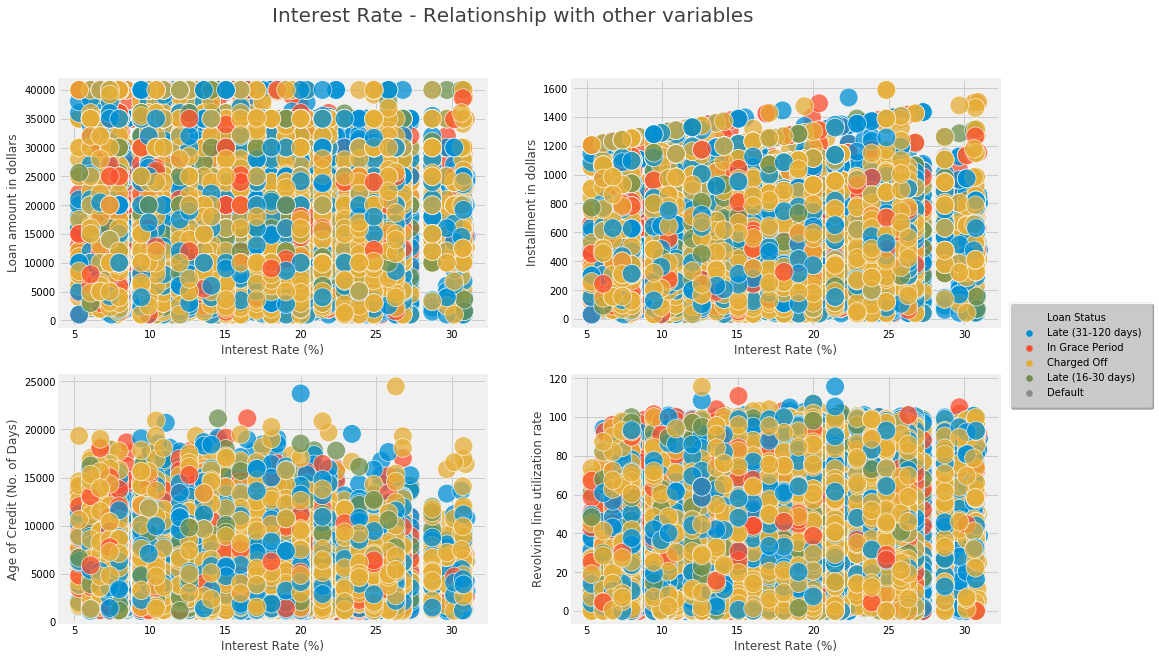

In [5]:
'''Interest Rate Distribution'''
loan_data_2018 = loan_data_2018[loan_data_2018['loan_status'] != 'Fully Paid']

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10))

'''first plot'''
plt.subplot(2, 2, 1)
sns.scatterplot(x="int_rate", y="loan_amnt", hue='loan_status', data=loan_data_2018, alpha=0.75, s=350, 
                legend=None)

plt.xlabel('Interest Rate (%)', alpha = 0.75)
plt.ylabel('Loan amount in dollars', alpha = 0.75)
    
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['int_rate'], loan_data_2018['loan_amnt'])
r_value = r_value*r_value

txt1 = "R-squared = {:1.3f}" 
#plt.text(x=2000000, y=500, s=txt1.format(r_value), fontsize=15, alpha=0.85)


'''second plot'''
plt.subplot(2, 2, 2)
sns.scatterplot(x="int_rate", y="installment", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Interest Rate (%)', alpha = 0.75)
plt.ylabel('Installment in dollars', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['int_rate'], loan_data_2018['installment'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
#plt.text(x=4000000, y=20000, s=txt2.format(r_value), fontsize=15, alpha=0.85)


'''third plot'''
plt.subplot(2, 2, 3)
sns.scatterplot(x="int_rate", y="age_of_credit_in_days", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Interest Rate (%)', alpha = 0.75)
plt.ylabel('Age of Credit (No. of Days)', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['int_rate'], loan_data_2018['age_of_credit_in_days'])
r_value = r_value*r_value
txt3 = "R-squared = {:1.3f}" 
#plt.text(x=4000000, y=15, s=txt3.format(r_value), fontsize=15, alpha=0.85)

'''fourth plot'''
plt.subplot(2, 2, 4)
sns.scatterplot(x="int_rate", y="revol_util", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350)

plt.xlabel('Interest Rate (%)', alpha = 0.75)
plt.ylabel('Revolving line utilization rate', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['int_rate'], loan_data_2018['revol_util'])
r_value = r_value*r_value
txt4 = "R-squared = {:1.3f}" 
#plt.text(x=1.5, y=1.5, s=txt4.format(r_value), fontsize=10, alpha=0.85)

plt.legend(bbox_to_anchor=(1.37, 0.85), fancybox=True, framealpha=0.5, shadow=True, borderpad=1, 
           loc='lower right').texts[0].set_text("Loan Status")

plt.suptitle('Interest Rate - Relationship with other variables', fontsize=20, alpha=0.75)

plt.savefig('plots/11.png', bbox_inches="tight")
plt.show()

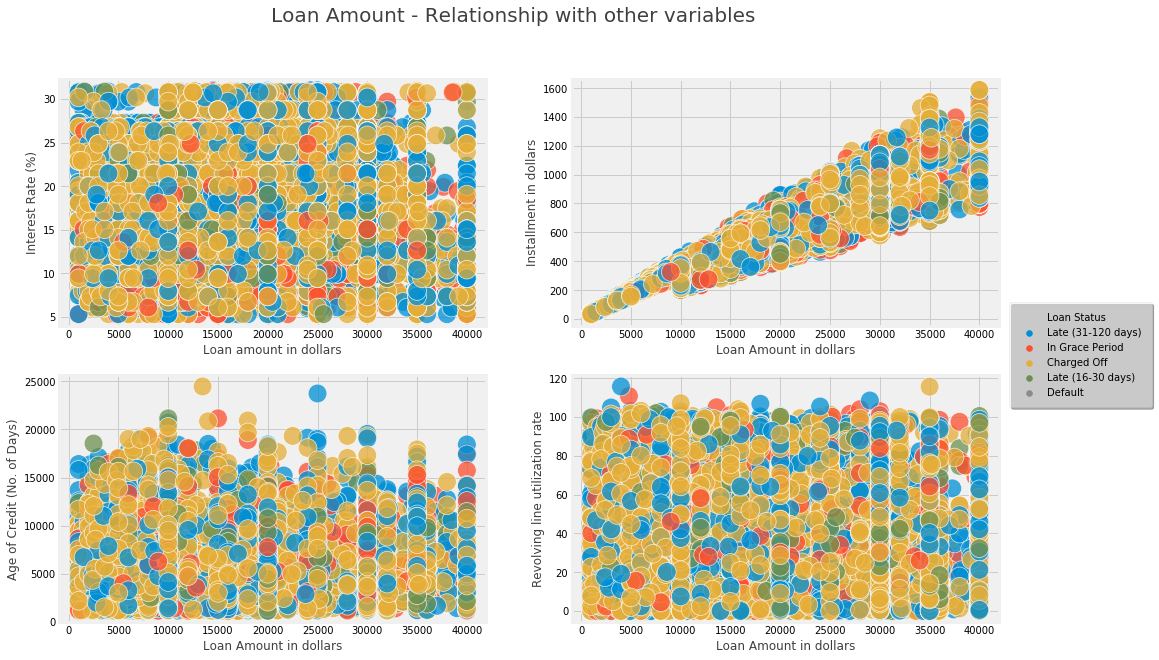

In [24]:
'''Loan Amount Distribution'''
#loan_data_2018 = loan_data_2018[loan_data_2018['loan_status'] != 'Fully Paid']

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10))

'''first plot'''
plt.subplot(2, 2, 1)
sns.scatterplot(x="loan_amnt", y="int_rate", hue='loan_status', data=loan_data_2018, alpha=0.75, s=350, 
                legend=None)

plt.xlabel('Loan amount in dollars', alpha = 0.75)
plt.ylabel('Interest Rate (%)', alpha = 0.75)
    
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['loan_amnt'], loan_data_2018['int_rate'])
r_value = r_value*r_value

txt1 = "R-squared = {:1.3f}" 
#plt.text(x=2000000, y=500, s=txt1.format(r_value), fontsize=15, alpha=0.85)


'''second plot'''
plt.subplot(2, 2, 2)
sns.scatterplot(x="loan_amnt", y="installment", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Loan Amount in dollars', alpha = 0.75)
plt.ylabel('Installment in dollars', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['loan_amnt'], loan_data_2018['installment'])
r_value = r_value*r_value
txt2 = "R-squared = {:1.3f}" 
#plt.text(x=4000000, y=20000, s=txt2.format(r_value), fontsize=15, alpha=0.85)


'''third plot'''
plt.subplot(2, 2, 3)
sns.scatterplot(x="loan_amnt", y="age_of_credit_in_days", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350, legend=None)

plt.xlabel('Loan Amount in dollars', alpha = 0.75)
plt.ylabel('Age of Credit (No. of Days)', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['loan_amnt'], loan_data_2018['age_of_credit_in_days'])
r_value = r_value*r_value
txt3 = "R-squared = {:1.3f}" 
#plt.text(x=4000000, y=15, s=txt3.format(r_value), fontsize=15, alpha=0.85)

'''fourth plot'''
plt.subplot(2, 2, 4)
sns.scatterplot(x="loan_amnt", y="revol_util", hue='loan_status', 
                data=loan_data_2018, alpha=0.75, s=350)

plt.xlabel('Loan Amount in dollars', alpha = 0.75)
plt.ylabel('Revolving line utilization rate', alpha = 0.75)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    loan_data_2018['loan_amnt'], loan_data_2018['revol_util'])
r_value = r_value*r_value
txt4 = "R-squared = {:1.3f}" 
#plt.text(x=1.5, y=1.5, s=txt4.format(r_value), fontsize=10, alpha=0.85)

plt.legend(bbox_to_anchor=(1.37, 0.85), fancybox=True, framealpha=0.5, shadow=True, borderpad=1, 
           loc='lower right').texts[0].set_text("Loan Status")

plt.suptitle('Loan Amount - Relationship with other variables', fontsize=20, alpha=0.75)

plt.savefig('plots/12.png', bbox_inches="tight")
plt.show()

In [6]:
loan_data['addr_state'].unique()

'''Make a list with each of the regions by state.'''
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


loan_data['Region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'South West'
    elif state in south_east:
        return 'South East'
    elif state in mid_west:
        return 'Mid West'
    elif state in north_east:
        return 'North East'


loan_data['Region'] = loan_data['addr_state'].apply(finding_regions)
loan_data['Region'].value_counts()

South East    323587
West          318529
North East    301767
Mid West      232678
South West    161663
Name: Region, dtype: int64

In [ ]:
loan_data.groupby('Region', 'loan_status').count()